In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


colorDic = {"blue" : "#6599FF", "yellow" : "#FFAD33",  "purple": "#683b96", "green" : "#198D6D", "red" : "#FF523F"}
colors = list(colorDic.values())

lables = ["Finger", "Knuckle"]

In [50]:
dfTLX = pd.read_csv("./DataStudyEvaluation/Knuckle Study - TLX.csv")

In [51]:
dfTLX['Score'] = dfTLX['Mental Demand'] + dfTLX['Physical Demand'] + dfTLX['Temporal Demand'] + dfTLX['Performance'] + dfTLX['Effort'] + dfTLX['Frustration']
dfTLX['Score'] = (dfTLX['Score']-6) / 6.0 

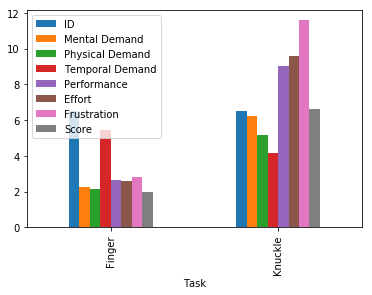

In [58]:
dfTLX.groupby("Task").mean().plot(kind="bar")

(0, 20)

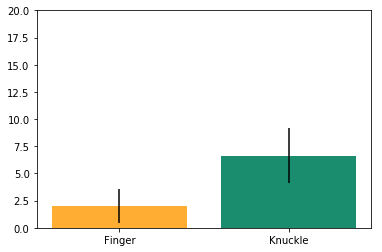

In [52]:
M = dfTLX.groupby("Task").mean().Score.values
STD = dfTLX.groupby("Task").std().Score.values
plt.bar([0], M[0], yerr=STD[0], color=colors[1])
plt.bar([1], M[1], yerr=STD[1], color=colors[3])
plt.xticks([0,1], lables)
plt.ylim(0,20)

In [147]:
s = "\\ac{RTLX}  "
c = "Score"
for con in ["Finger", "Knuckle"]:
    s = "%s & %.1f" % (s, dfTLX[dfTLX.Task == con].mean()[c])
    s = "%s & %.1f" % (s, dfTLX[dfTLX.Task == con].std()[c])
print(s + " \\\\")

\ac{RTLX}   & 2.0 & 1.6 & 6.6 & 2.5 \\


In [141]:
dfTLX[["ID", "Task", "Score"]].to_csv("./DataStudyEvaluation/R_TLX.csv", index=False)

In [137]:
dfSUS = pd.read_csv("./DataStudyEvaluation/Knuckle Study - SUS.csv")
dfSUS.Q1 = dfSUS.Q1 - 1
dfSUS.Q3 = dfSUS.Q3 - 1
dfSUS.Q5 = dfSUS.Q5 - 1
dfSUS.Q7 = dfSUS.Q7 - 1
dfSUS.Q9 = dfSUS.Q9 - 1

dfSUS.Q2 = 5 - dfSUS.Q2
dfSUS.Q4 = 5 - dfSUS.Q4
dfSUS.Q6 = 5 - dfSUS.Q6
dfSUS.Q8 = 5 - dfSUS.Q8
dfSUS.Q10 = 5 - dfSUS.Q10
dfSUS["Score"] = dfSUS.Q1 + dfSUS.Q2 + dfSUS.Q3 + dfSUS.Q4 + dfSUS.Q5 + dfSUS.Q6 + dfSUS.Q7 + dfSUS.Q8 + dfSUS.Q9 + dfSUS.Q10
dfSUS.Score = dfSUS.Score * 2.5

(0, 100)

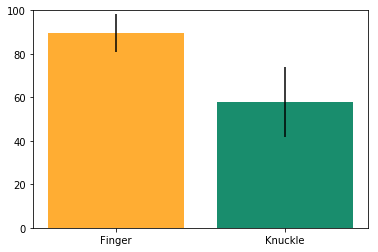

In [138]:
M = dfSUS.groupby("Task").mean().Score.values
STD = dfSUS.groupby("Task").std().Score.values
plt.bar([0], M[0], yerr=STD[0], color=colors[1])
plt.bar([1], M[1], yerr=STD[1], color=colors[3])
plt.xticks([0,1], lables)
plt.ylim(0,100)

In [146]:
s = "SUS  "
c = "Score"
for con in ["Finger", "Knuckle"]:
    s = "%s & %.1f" % (s, dfSUS[dfSUS.Task == con].mean()[c])
    s = "%s & %.1f" % (s, dfSUS[dfSUS.Task == con].std()[c])
print(s + " \\\\")

SUS   & 89.6 & 8.8 & 57.9 & 16.1 \\


In [140]:
dfSUS[["ID", "Task", "Score"]].to_csv("./DataStudyEvaluation/R_SUS.csv", index=False)

In [107]:
dfQ = pd.read_csv("./DataStudyEvaluation/Knuckle Study - Quest..csv")

In [108]:
cols = ['Difficult-Easy', 'Slow-Fast', 'Frustrated-Successful', 'Inaccurate-Accurate', 'Straining-Comfortable']
lablesQ = ['Easiness', 'Speed', 'Success', 'Accuracy', 'Comfort']

In [123]:
for i, c in enumerate(cols):
    s = lablesQ[i] + " "
    for con in ["Finger", "Knuckle"]:
        s = "%s & %.1f" % (s, dfQ[dfQ.Task == con].mean()[c])
        s = "%s & %.1f" % (s, dfQ[dfQ.Task == con].std()[c])
    print(s + " \\\\")

Easiness  & 6.7 & 0.8 & 4.8 & 1.6 \\
Speed  & 6.7 & 0.5 & 2.9 & 1.2 \\
Success  & 6.1 & 1.6 & 3.6 & 1.7 \\
Accuracy  & 6.2 & 1.3 & 3.4 & 1.4 \\
Comfort  & 6.7 & 0.7 & 3.1 & 1.4 \\


(1, 7)

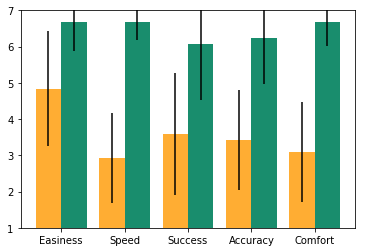

In [109]:
M = dfQ[dfQ.Task == "Knuckle"].mean()[cols]
STD = dfQ[dfQ.Task == "Knuckle"].std()[cols]
plt.bar(np.array(np.arange(len(M))) -0.2, M, yerr=STD, width=.4,  color=colors[1])

M = dfQ[dfQ.Task == "Finger"].mean()[cols]
STD = dfQ[dfQ.Task == "Finger"].std()[cols]
plt.bar(np.array(np.arange(len(M))) +0.2, M, yerr=STD, width=.4, color=colors[3])
plt.xticks(list(range(len(M))), lablesQ)
plt.ylim(1,7)

In [136]:
dfX = dfQ.copy(deep=True)
lst = dfX.columns[:2].to_list()
lst.extend(lablesQ)
dfX.columns = lst
dfX.to_csv("./DataStudyEvaluation/R_Quest.csv", index=False)